# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from scipy.stats import linregress
from scipy import stats
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
# May need to run 'pip install citipy' in terminal to use the citipy package
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#lat_range = (88, 90)
#lng_range = (178, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lats = np.random.uniform(low=60.000, high=90.000, size=1500)
#lngs = np.random.uniform(low=160.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
len(cities)
url = "http://api.openweathermap.org/data/2.5/weather?"

temperature = []
lat = []
lng = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
max_temp = []
weather_cities = []

# OpenWeatherMap API has a limit of 60 calls/minute, so I'm setting a counter to stop at 50 and wait a minute

count = 1
sets = 1
t0 =time.time()

print("Beginning Data Retrieval")
print("----------------------------")

for x in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + x + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_response_json = weather_response.json()      
    try:
        city_id = weather_response_json["id"]
        print(f'Processing Record {count} of Set {sets} | City Id: {city_id} and City Name  {x}')
        temperature.append(weather_response_json["main"]["temp"])
        lat.append(weather_response_json["coord"]["lat"])
        lng.append(weather_response_json["coord"]["lon"])
        humidity.append(weather_response_json["main"]["humidity"])
        cloudiness.append(weather_response_json["clouds"]["all"])
        wind_speed.append(weather_response_json["wind"]["speed"])
        country.append(weather_response_json["sys"]["country"])
        date.append(weather_response_json["dt"])
        max_temp.append(weather_response_json["main"]["temp_max"])
        weather_cities.append(x)
    except KeyError:
        print(f"City not found. Skipping... {x}") 

    count = count+1
    if count == 51:
        t1=time.time()
        count = 1
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")   



Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | City Id: 4034551 and City Name  faanui
Processing Record 2 of Set 1 | City Id: 5848280 and City Name  kapaa
Processing Record 3 of Set 1 | City Id: 57000 and City Name  hobyo
Processing Record 4 of Set 1 | City Id: 1511057 and City Name  bakchar
Processing Record 5 of Set 1 | City Id: 3652764 and City Name  puerto ayora
Processing Record 6 of Set 1 | City Id: 4030556 and City Name  rikitea
Processing Record 7 of Set 1 | City Id: 2126199 and City Name  cherskiy
Processing Record 8 of Set 1 | City Id: 3874787 and City Name  punta arenas
Processing Record 9 of Set 1 | City Id: 161616 and City Name  balkanabat
Processing Record 10 of Set 1 | City Id: 3883457 and City Name  lebu
Processing Record 11 of Set 1 | City Id: 3942957 and City Name  cocachacra
Processing Record 12 of Set 1 | City Id: 5106841 and City Name  albany
Processing Record 13 of Set 1 | City Id: 3414079 and City Name  olafsvik
Processing Re

Processing Record 18 of Set 3 | City Id: 1640344 and City Name  kendari
Processing Record 19 of Set 3 | City Id: 3397941 and City Name  itapage
Processing Record 20 of Set 3 | City Id: 5919850 and City Name  chapais
Processing Record 21 of Set 3 | City Id: 2409914 and City Name  bonthe
City not found. Skipping... tumannyy
Processing Record 23 of Set 3 | City Id: 2455290 and City Name  kidal
Processing Record 24 of Set 3 | City Id: 3698359 and City Name  chicama
Processing Record 25 of Set 3 | City Id: 3372707 and City Name  ribeira grande
City not found. Skipping... mys shmidta
Processing Record 27 of Set 3 | City Id: 2071860 and City Name  esperance
Processing Record 28 of Set 3 | City Id: 4513583 and City Name  hamilton
Processing Record 29 of Set 3 | City Id: 3381041 and City Name  mana
City not found. Skipping... lolua
Processing Record 31 of Set 3 | City Id: 964420 and City Name  port elizabeth
Processing Record 32 of Set 3 | City Id: 3985710 and City Name  cabo san lucas
Processi

Processing Record 39 of Set 5 | City Id: 5905393 and City Name  bonavista
Processing Record 40 of Set 5 | City Id: 3576994 and City Name  cockburn town
Processing Record 41 of Set 5 | City Id: 2264557 and City Name  ponta do sol
Processing Record 42 of Set 5 | City Id: 293842 and City Name  gat
Processing Record 43 of Set 5 | City Id: 922704 and City Name  lubumbashi
Processing Record 44 of Set 5 | City Id: 5882953 and City Name  aklavik
Processing Record 45 of Set 5 | City Id: 2933115 and City Name  eggenfelden
City not found. Skipping... burica
Processing Record 47 of Set 5 | City Id: 6137462 and City Name  saint-augustin
Processing Record 48 of Set 5 | City Id: 6167817 and City Name  torbay
City not found. Skipping... ngukurr
Processing Record 50 of Set 5 | City Id: 3984997 and City Name  san quintin
Processing Record 1 of Set 6 | City Id: 2236967 and City Name  soyo
Processing Record 2 of Set 6 | City Id: 866062 and City Name  iskateley
City not found. Skipping... barbar
City not f

Processing Record 8 of Set 8 | City Id: 1512019 and City Name  aksarka
Processing Record 9 of Set 8 | City Id: 2159220 and City Name  mackay
Processing Record 10 of Set 8 | City Id: 1337619 and City Name  ugoofaaru
Processing Record 11 of Set 8 | City Id: 3893629 and City Name  coquimbo
Processing Record 12 of Set 8 | City Id: 1847947 and City Name  shingu
Processing Record 13 of Set 8 | City Id: 1254832 and City Name  tawang
Processing Record 14 of Set 8 | City Id: 1510842 and City Name  barsovo
Processing Record 15 of Set 8 | City Id: 6316343 and City Name  alta floresta
Processing Record 16 of Set 8 | City Id: 358620 and City Name  safaga
Processing Record 17 of Set 8 | City Id: 1790437 and City Name  zhuhai
Processing Record 18 of Set 8 | City Id: 4172139 and City Name  sarasota
City not found. Skipping... anklesvar
Processing Record 20 of Set 8 | City Id: 4231997 and City Name  avera
Processing Record 21 of Set 8 | City Id: 2169535 and City Name  dalby
Processing Record 22 of Set 

Processing Record 24 of Set 10 | City Id: 2270385 and City Name  camacha
Processing Record 25 of Set 10 | City Id: 517739 and City Name  novouzensk
Processing Record 26 of Set 10 | City Id: 2027316 and City Name  ayan
Processing Record 27 of Set 10 | City Id: 3382160 and City Name  cayenne
Processing Record 28 of Set 10 | City Id: 533690 and City Name  louga
Processing Record 29 of Set 10 | City Id: 1045114 and City Name  inhambane
Processing Record 30 of Set 10 | City Id: 88533 and City Name  awjilah
Processing Record 31 of Set 10 | City Id: 2514651 and City Name  los llanos de aridane
Processing Record 32 of Set 10 | City Id: 3839307 and City Name  rawson
Processing Record 33 of Set 10 | City Id: 2012530 and City Name  zhigansk
Processing Record 34 of Set 10 | City Id: 1486321 and City Name  yar-sale
Processing Record 35 of Set 10 | City Id: 3452320 and City Name  presidente venceslau
City not found. Skipping... formoso do araguaia
Processing Record 37 of Set 10 | City Id: 4229763 an

Processing Record 41 of Set 12 | City Id: 6162949 and City Name  terrace
Processing Record 42 of Set 12 | City Id: 3580236 and City Name  grenville
Processing Record 43 of Set 12 | City Id: 5478673 and City Name  meadow lake
Processing Record 44 of Set 12 | City Id: 1791779 and City Name  wanning
Processing Record 45 of Set 12 | City Id: 1062553 and City Name  mahanoro
Processing Record 46 of Set 12 | City Id: 89113 and City Name  ajdabiya
Processing Record 47 of Set 12 | City Id: 2134814 and City Name  sola
Processing Record 48 of Set 12 | City Id: 3664956 and City Name  boca do acre
Processing Record 49 of Set 12 | City Id: 5924618 and City Name  cochrane
Processing Record 50 of Set 12 | City Id: 3521972 and City Name  panaba
Processing Record 1 of Set 13 | City Id: 1257673 and City Name  sakti
Processing Record 2 of Set 13 | City Id: 3393692 and City Name  itarema
Processing Record 3 of Set 13 | City Id: 4985180 and City Name  bay city
Processing Record 4 of Set 13 | City Id: 228160

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary from the API data.  
weather_dict = {
    "City": weather_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

In [5]:
# Create a dataframe from the dictionary I created from the API data

city_weather_df = pd.DataFrame(weather_dict)
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,faanui,12,PF,1584246943,77,-16.48,-151.75,82.90,11.43
1,kapaa,1,US,1584246943,64,22.08,-159.32,75.20,11.41
2,hobyo,78,SO,1584246944,74,5.35,48.53,82.06,13.89
3,bakchar,95,RU,1584246905,90,57.02,82.07,35.67,11.83
4,puerto ayora,2,EC,1584246944,80,-0.74,-90.35,79.00,5.01


In [6]:
# export the city weather data to csv

city_weather_df.to_csv("WeatherPY.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

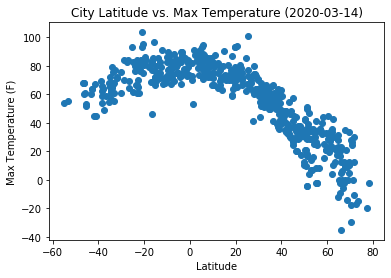

In [7]:
# Create a scatter plot showing the relationship between and latitude and max temp

plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker='o' )
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("LatVsTemp.png")
plt.show()

In [ ]:
#Analysis:  
#The latitude vs. temp plot is showing us that the temperatures around lat 0 are highest.  
#The higher latitudes have the coldest temps

#### Latitude vs. Humidity Plot

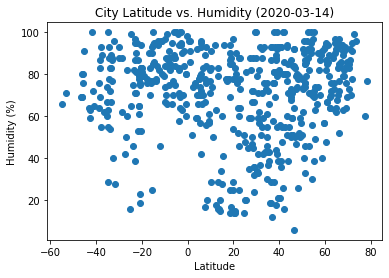

In [8]:
# Create a scatter plot showing the relationship between and latitude and Humidity

plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker='o' )
plt.title(f"City Latitude vs. Humidity ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("LatVsHumidity.png")
plt.show()

In [ ]:
# Analysis:
#The latitude vs. humidity plot is showing us that humidity levels are not strongly tied to latitude although there
# seems to be a slightly larger concentration of humidity at higher temps.

#### Latitude vs. Cloudiness Plot

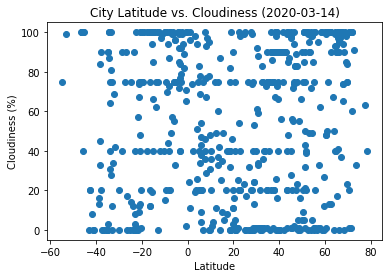

In [9]:
# Create a scatter plot showing the relationship between and latitude and Cloudiness

plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker='o' )
plt.title(f"City Latitude vs. Cloudiness ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("LatVsCloudiness.png")
plt.show()

In [ ]:
# Analysis:
#The latitude vs. cloudiness plot is showing us that cloudiness is not strongly tied to latitude.

#### Latitude vs. Wind Speed Plot

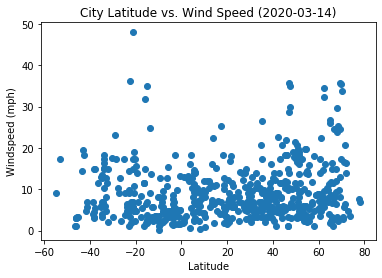

In [10]:
# Create a scatter plot showing the relationship between and latitude and Windspeed

plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker='o' )
plt.title(f"City Latitude vs. Wind Speed ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")

plt.savefig("LatVsWindspeed.png")
plt.show()

In [ ]:
# Analysis:
# The latitude vs. wind speed plot is showing us that windspeed is not strongly tied to latitude and is pretty similar 
#  for most latitudes.

## Linear Regression

In [11]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_weather_df["Lat"], city_weather_df["Max Temp"])

# Get regression values
regress_values = city_weather_df["Lat"] * slope + intercept
print(regress_values)

0      77.477938
1      54.134261
2      64.262366
3      32.982082
4      67.949165
         ...    
551    78.277047
552    35.337032
553    36.414619
554    68.451635
555    69.844023
Name: Lat, Length: 556, dtype: float64


y = -0.61x +67.5
The r-squared is: -0.7550177689402654


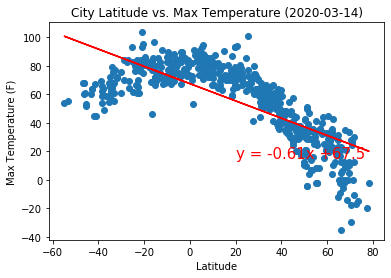

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots
# Create a scatter plot showing the relationship between and latitude and max temp

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker='o' )
plt.title(f"City Latitude vs. Max Temperature ({datetime.now().date()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.plot(city_weather_df["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue}")

plt.savefig("LatVsTempLR.png")

# Show plot
plt.show()

In [13]:
# Create Northern Hemisphere DataFrame

northern_df = city_weather_df[city_weather_df["Lat"] >= 0]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,kapaa,1,US,1584246943,64,22.08,-159.32,75.20,11.41
2,hobyo,78,SO,1584246944,74,5.35,48.53,82.06,13.89
3,bakchar,95,RU,1584246905,90,57.02,82.07,35.67,11.83
6,cherskiy,100,RU,1584246666,93,68.75,161.30,8.94,9.86
8,balkanabat,66,TM,1584246945,39,39.51,54.37,62.42,3.09


In [14]:
# Create Southern Hemisphere DataFrame

southern_df = city_weather_df[city_weather_df["Lat"] < 0]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,faanui,12,PF,1584246943,77,-16.48,-151.75,82.90,11.43
4,puerto ayora,2,EC,1584246944,80,-0.74,-90.35,79.00,5.01
5,rikitea,3,PF,1584246944,71,-23.12,-134.97,78.84,9.75
7,punta arenas,99,CL,1584246580,71,-53.15,-70.92,55.40,17.22
9,lebu,0,CL,1584246945,89,-37.62,-73.65,48.85,5.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [16]:
#  Create a UDF that will work for both the northern and southern hemipheres

def plotting_udf(dframe):

# Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dframe["Lat"], dframe["Max Temp"])

# Get regression values
    regress_values = dframe["Lat"] * slope + intercept
    print(regress_values)

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(dframe["Lat"], dframe["Max Temp"], marker='o' )
    plt.title(f"City Latitude vs. Max Temperature Linear Regression ({datetime.now().date()})")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temperature (F)")

    plt.plot(dframe["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    
#    plt.savefig(f"LatVsTempLR_{dframe}.png")  
# Show plot
#    plt.show()

1      66.977845
2      87.370863
3      24.387762
6      10.089489
8      45.731561
         ...    
547    40.758249
548    85.822798
550    43.574021
552    29.129474
553    31.299204
Name: Lat, Length: 384, dtype: float64
y = -1.22x +93.89
The r-squared is: -0.9018540618313247


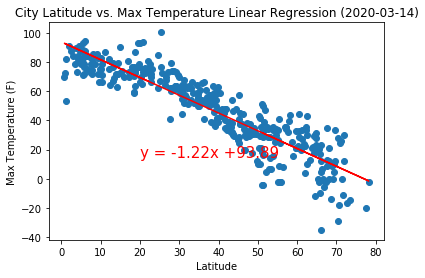

In [17]:
# Call the user defined function from above using the northern hemisphere dataframe

plotting_udf(northern_df)
plt.savefig("LatVsTempLR_northern.png") 
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0      75.802215
4      83.172455
5      72.693042
7      58.631523
9      65.903431
         ...    
546    82.151672
549    76.509271
551    75.184127
554    82.783808
555    81.706836
Name: Lat, Length: 172, dtype: float64
y = 0.47x +83.52
The r-squared is: 0.5965986699271625


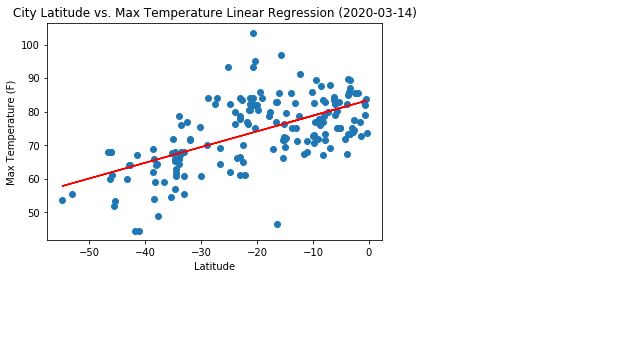

In [18]:
# Call the user defined function from above using the southern hemisphere dataframe

plotting_udf(southern_df)
plt.savefig("LatVsTempLR_southern.png")
plt.show()

In [ ]:
# Analysis - Northern/Southern Hemisphere - Latitude and Max Temp
#These two are pretty much opposites.  One shows a postive regression and one shows a negative regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [19]:
def plotting_udf(dframe):
    
# Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dframe["Lat"], dframe["Humidity"])

# Get regression values
    regress_values = dframe["Lat"] * slope + intercept
    print(regress_values)

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(dframe["Lat"], dframe["Humidity"], marker='o' )
    plt.title(f"City Latitude vs. Humidity Linear Regression ({datetime.now().date()})")
    plt.xlabel("Latitude")
    plt.ylabel("Humidity")

    plt.plot(dframe["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    
#    plt.savefig(f"LatVsHumidityLR_{dframe}.png")  
# Show plot
#    plt.show()

1      63.776180
2      59.210723
3      73.310972
6      76.511976
8      68.532660
         ...    
547    69.646053
548    59.557294
550    69.015676
552    72.249428
553    71.763683
Name: Lat, Length: 384, dtype: float64
y = 0.27x +57.75
The r-squared is: 0.23772999144194956


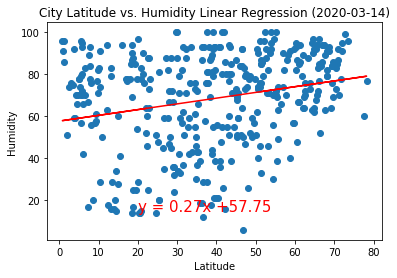

In [20]:
# Call the user defined function from above using the northern hemisphere dataframe

plotting_udf(northern_df)

plt.savefig(f"LatVsHumidityLR_northern.png")  
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      78.233562
4      82.978609
5      76.231840
7      67.178870
9      71.860609
         ...    
546    82.321417
549    78.688773
551    77.835629
554    82.728393
555    82.035026
Name: Lat, Length: 172, dtype: float64
y = 0.3x +83.2
The r-squared is: 0.23834734301452343


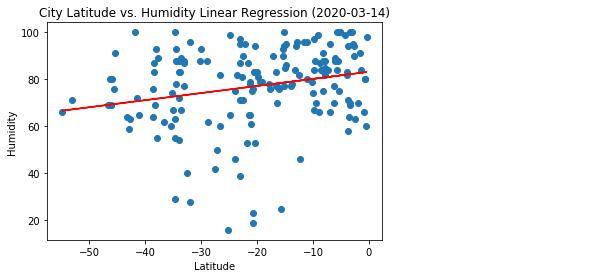

In [21]:
# Call the user defined function from above using the southern hemisphere dataframe

plotting_udf(southern_df)

plt.savefig("LatVsHumidityLR_southern.png")
plt.show()

In [ ]:
# Analysis - Northern/Southern Hemisphere - Latitude and Humidity
#The linear regression for these is very similar which means that the relationship between humidity and latitude are the same
# for both hemishperes.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [22]:
def plotting_udf(dframe):
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dframe["Lat"], dframe["Cloudiness"])

# Get regression values
    regress_values = dframe["Lat"] * slope + intercept
    print(regress_values)

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(dframe["Lat"], dframe["Cloudiness"], marker='o' )
    plt.title(f"City Latitude vs. Cloudiness Linear Regression ({datetime.now().date()})")
    plt.xlabel("Latitude")
    plt.ylabel("Cloudiness")

    plt.plot(dframe["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    
#    plt.savefig(f"LatVsCloudinessLR_{dframe}.png")  
# Show plot
#    plt.show()

1      44.786386
2      36.858111
3      61.344301
6      66.903098
8      53.046388
         ...    
547    54.979882
548    37.459959
550    53.885183
552    59.500847
553    58.657313
Name: Lat, Length: 384, dtype: float64
y = 0.47x +34.32
The r-squared is: 0.2531342005055484


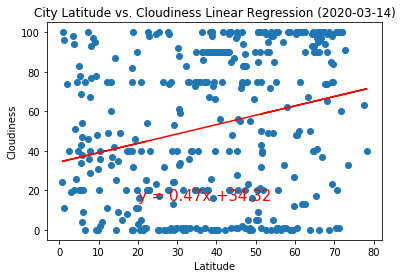

In [23]:
# Call the user defined function from above using the northern hemisphere dataframe

plotting_udf(northern_df)

plt.savefig("LatVsCloudinessLR_northern.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      61.601106
4      74.136730
5      56.312888
7      32.396447
9      44.764823
         ...    
546    72.400538
549    62.803698
551    60.549834
554    73.475703
555    71.643941
Name: Lat, Length: 172, dtype: float64
y = 0.8x +74.73
The r-squared is: 0.2864718235477661


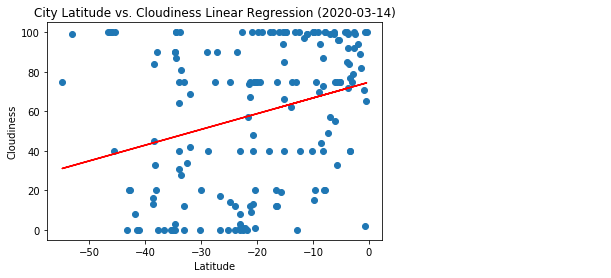

In [24]:
# Call the user defined function from above using the southern hemisphere dataframe

plotting_udf(southern_df)

plt.savefig("LatVsCloudinessLR_southern.png")
plt.show()

In [ ]:
# Analysis - Northern/Southern Hemisphere - Latitude and Cloudiness
#The linear regression for these is very similar which means that the relationship between cloudiness and latitude are the same
# for both hemishperes.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [25]:
def plotting_udf(dframe):
    
    # Perform a linear regression on wind speed vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dframe["Lat"], dframe["Wind Speed"])

# Get regression values
    regress_values = dframe["Lat"] * slope + intercept
    print(regress_values)

# Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(line_eq)

    plt.scatter(dframe["Lat"], dframe["Wind Speed"], marker='o' )
    plt.title(f"City Latitude vs. Wind Speed Linear Regression ({datetime.now().date()})")
    plt.xlabel("Latitude")
    plt.ylabel("Wind Speed")

    plt.plot(dframe["Lat"],regress_values,"r-")

# Label plot and annotate the line equation
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
    print(f"The r-squared is: {rvalue}")
    
#    plt.savefig(f"LatVsCloudinessLR_{dframe}.png")  
# Show plot
#    plt.show()

1       8.290617
2       7.073990
3      10.831498
6      11.684518
8       9.558149
         ...    
547     9.854851
548     7.166346
550     9.686865
552    10.548612
553    10.419168
Name: Lat, Length: 384, dtype: float64
y = 0.07x +6.68
The r-squared is: 0.21843997414411792


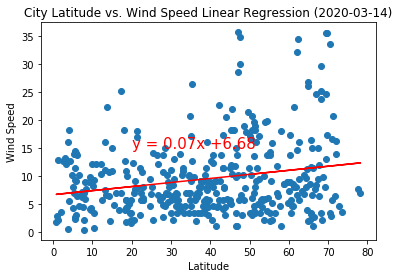

In [26]:
# Call the user defined function from above using the northern hemisphere dataframe

plotting_udf(northern_df)

plt.savefig("LatVsWindSpeedLR_northern.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0       7.799014
4       6.409017
5       8.385391
7      11.037336
9       9.665884
         ...    
546     6.601532
549     7.665666
551     7.915583
554     6.482314
555     6.685427
Name: Lat, Length: 172, dtype: float64
y = -0.09x +6.34
The r-squared is: -0.1697591994529473


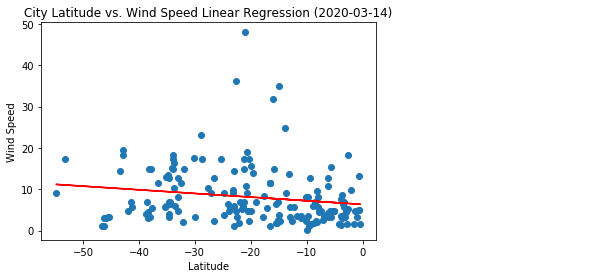

In [27]:
# Call the user defined function from above using the southern hemisphere dataframe

plotting_udf(southern_df)
plt.savefig("LatVsWindSpeedLR_southern.png")
plt.show()

In [ ]:
# Analysis - Northern/Southern Hemisphere - Latitude and Wind Speed
#The linear regression for these vary slightly.  The Northern Hemisphere seems to have more wind as the latitude increases.  
# The southern hemisphere seems to have more wind as the latitude decreases.